# **Neural Networks implemented in Python's Tensor flow**

## **Part 3, our First Neural Networks:**

### **Section 1, Learn the Dataset:**

Lets import our stuff again

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras # type: ignore
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
import tensorflow.compat.v2.feature_column as fc # type: ignore
import tensorflow.compat.v1 as tf1 # type: ignore

from tensorflow.keras import datasets, layers, models

Then load our data

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

And normalize our data

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']

Then display 1 image

Text(0.5, 0, 'bird')

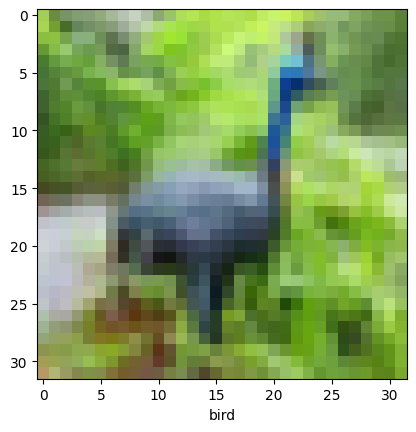

In [7]:
image_number = 6

plt.imshow(train_images[image_number], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[image_number][0]])

### Section 2, Build the model:

In [8]:
# Implementing the architecture

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Lets take our CNN & make this 1 dimensional

In [10]:
model.add(layers.Flatten()) # Flatten everything into 1 layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output layer of 10 for our 10 cases

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

With that achieved its compile time

In [12]:
model.compile(  optimizer='adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # type: ignore
                metrics=['accuracy']    )

history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.3560 - loss: 1.7448 - val_accuracy: 0.5519 - val_loss: 1.2551
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5772 - loss: 1.1858 - val_accuracy: 0.5899 - val_loss: 1.1353
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6405 - loss: 1.0146 - val_accuracy: 0.6544 - val_loss: 0.9736
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6843 - loss: 0.9018 - val_accuracy: 0.6785 - val_loss: 0.9177


And test time right after

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2); print(test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.6785 - loss: 0.9177
0.6784999966621399


69% Accuracy - lets work from here (even tho more epoch's look like they'd optimize further)

First lets use our image generating package

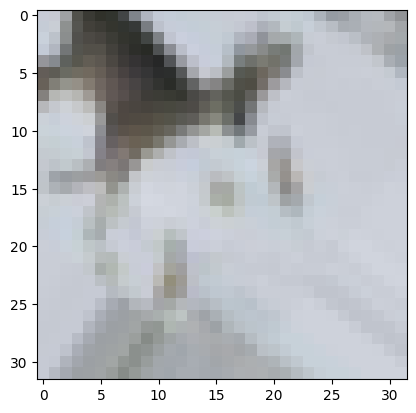

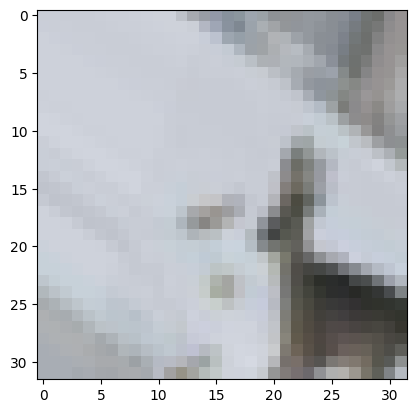

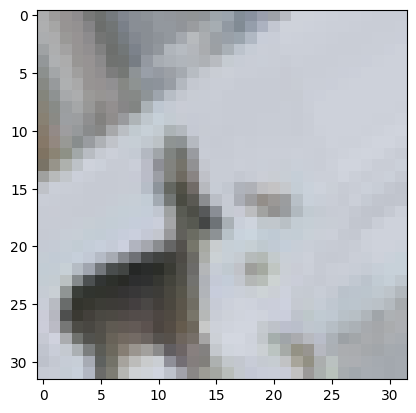

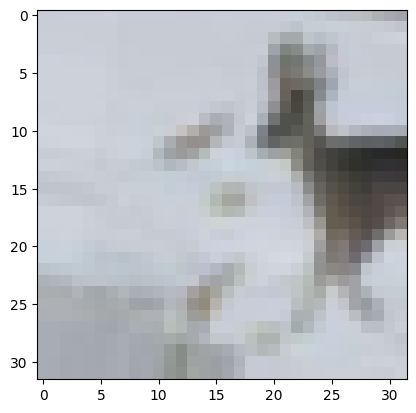

In [17]:
import keras.preprocessing # type: ignore
from keras.preprocessing import image # type: ignore
from keras.preprocessing.image import * #ImageDataGenerator # type: ignore # bugfix req
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator # type: ignore

# creates a data generator object that transforms images 
datagen = ImageDataGenerator( rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest') 

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)
i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format='jpeg'): #saves as test.jpg
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i >= 4: break # show 4 images break 

plt.show() 

4:23:00
